# Central limit theorem

Take $N$ indipendent and identically distributed (i.i.d.) random variables ${x_1, x_2, x_3 ..., x_N}$ and imagine the distribution of the random variable $x$ has $E[x_i] = \mu$ and $Var[x_i]=\sigma^2$.
The distribution of the variable $\bar{x} = x_1 + x_2 + x_3 + ... x_N$ converge to a normal distribution as $N$ increseas. <br>
The normal distribution to which converges has the following properties: 
* the mean of such distribution is $N\mu$
* the standard deviation is $\sqrt{N} \sigma$. This is given by the facte that the variance of $\bar{x}$ is given by the sum of the variances of the i.i.d $x_i$, namely $Var[\bar{x}] = \sigma_{x_1}^2 + \sigma_{x_2}^2 + ... + \sigma_{x_N}^2$. <br>

*Normally, to satisfy such a convergence $N\ge{30}$ is needed.* <br>
Below, is reported an example with dices. The random variable $x$ is sampled from the uniform distribution of the dice. Than the distribution of the sum $\bar{x}$ of $N=50$ random variables $x$ will be done.

In [1]:
import random
# uniform distribution of rolling a dice
def x_distribution():
    return random.randint(1,6)
mu_x = 3.5 # = (1/6)*(1+2+3+4+5+6)
var_x = 2.92 # (1/6)*( (1-mu_x)**2 + ... + (6-mu_x)**2)

In [2]:
# sample on x_bar
def sample_x_bar(N=30):
    x_bar = 0
    for i in range(0,N): x_bar += x_distribution()
    return x_bar

In [3]:
# let's see how x_bar is distributed by sampling 10_000 x_bars

n_samples = 10_000
N=50
x_bar_samples = [None for i in range(0,n_samples)]

for sample in range(0,n_samples):
    x_bar_samples[sample] = sample_x_bar(N)

Text(0.5, 1.0, 'Distribution of $\\bar{x}$')

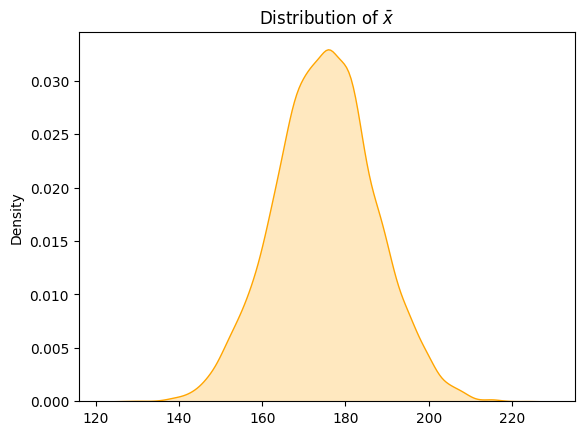

In [4]:
# the distribution of x_bar
import seaborn as sns
import matplotlib.pyplot as plt

sns.kdeplot(x_bar_samples, fill = True , color = "Orange")
plt.title(r'Distribution of $\bar{x}$')

expcted mean 175.0; sample mean 174.9578
expcted std 12.083045973594572; sample mean 11.998734064892012


<AxesSubplot: title={'center': 'Distribution of normalized $\\bar{x}$'}, ylabel='Density'>

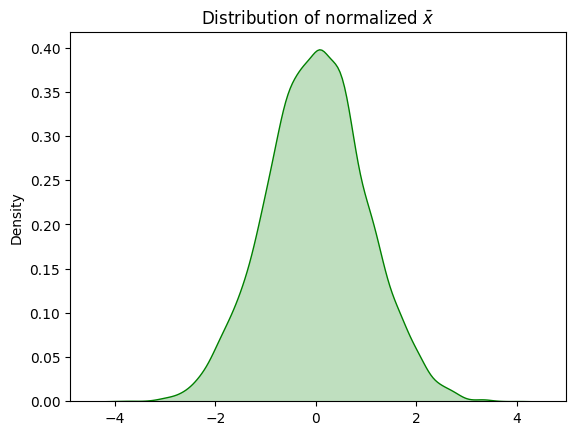

In [5]:
# the distribution normalilzed
import math
import numpy as np

expected_mean = mu_x*N
expected_sigma = math.sqrt(N)*math.sqrt(var_x)

sample_mean = np.mean(x_bar_samples)
sample_sigma = np.std(x_bar_samples)

print(f"expcted mean {expected_mean}; sample mean {sample_mean}")
print(f"expcted std {expected_sigma}; sample mean {sample_sigma}")

plt.title(r'Distribution of normalized $\bar{x}$')
norm_x_bar_sampeles = [ (x_bar_samples[i]-expected_mean)/expected_sigma   for i in range(0, len(x_bar_samples)) ]
sns.kdeplot(norm_x_bar_sampeles , fill = True , color = "Green")

<AxesSubplot: ylabel='Density'>

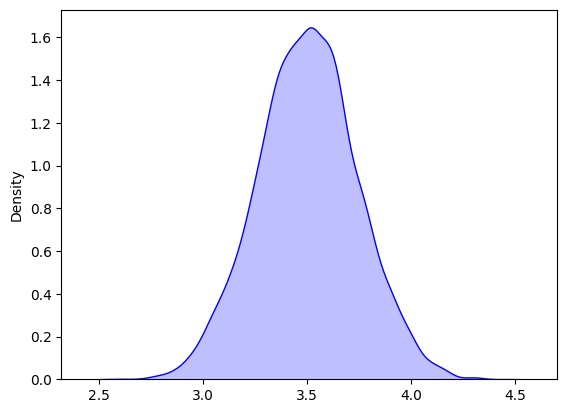

In [6]:
# let's what now to the distribution of x_bar/N

x_bar_means = [ (x_bar_samples[i])/N   for i in range(0, len(x_bar_samples)) ]
sns.kdeplot(x_bar_means , fill = True , color = "Blue")

With the distribution of the means of $\bar{x}$, i.e. $\bar{x}/N$, inferences can be made. <br>
An example of application is https://www.analytixlabs.co.in/blog/central-limit-theorem-with-example/